In [4]:
#dataset tasavire adadde 0 ta 9
from sklearn.datasets import  load_digits
digits = load_digits()

In [6]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
digits.target.shape

(1797,)

In [8]:
digits.data.shape

(1797, 64)

In [9]:
#bordare sebudii(3D) !
digits.images.shape

(1797, 8, 8)

0


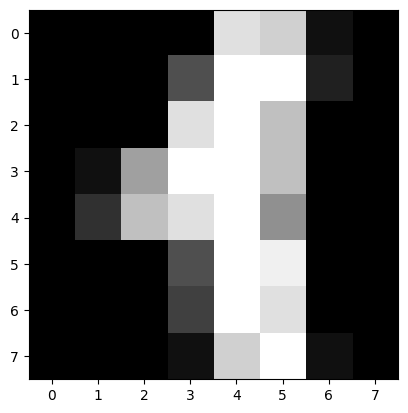

In [17]:
import matplotlib.pyplot as plt

print(digits.target[1])
x = digits.images[1]
plt.gray()
plt.imshow(x)
plt.show()

 

## Preprocess

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

 


In [19]:
x_train[0]

array([ 0.,  0.,  7., 14., 16.,  8.,  0.,  0.,  0.,  0., 14., 14., 16.,
       14.,  0.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,
        4.,  4., 14.,  9.,  2.,  0.,  0.,  7., 16., 16., 16., 16.,  7.,
        0.,  0.,  6., 12., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2., 16.,
        3.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.])

In [20]:
x_test[0]

array([ 0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 11.,
        1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  2.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  4.,  4.,  0.,
        0.,  0.,  2., 15., 16., 16., 14., 10.,  1.,  0.,  0.,  9., 16.,
        7.,  3., 15.,  6.,  0.,  0.,  0.,  7., 15., 16., 16.,  6.])

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
#dadeye test ra fit nemikonim chon farz bar in ast ke dadeye test ra nadideeim
x_test = scaler.transform(x_test)

In [25]:
x_train[0]

array([0.        , 0.        , 0.4375    , 0.875     , 1.        ,
       0.5       , 0.        , 0.        , 0.        , 0.        ,
       0.875     , 0.875     , 1.        , 0.875     , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.625     , 0.75      , 0.        , 0.        , 0.        ,
       0.        , 0.25      , 0.25      , 0.875     , 0.5625    ,
       0.13333333, 0.        , 0.        , 0.5       , 1.        ,
       1.        , 1.        , 1.        , 0.5       , 0.        ,
       0.        , 0.375     , 0.75      , 1.        , 0.6875    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.125     , 1.        , 0.1875    , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.        , 0.        , 0.        , 0.        ])

In [26]:
x_test[0]

array([0.        , 0.        , 0.        , 0.5625    , 0.9375    ,
       0.125     , 0.        , 0.        , 0.        , 0.        ,
       0.3125    , 1.        , 0.6875    , 0.0625    , 0.        ,
       0.        , 0.        , 0.        , 0.8125    , 0.9375    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.13333333, 1.        , 0.6875    , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14285714, 1.        ,
       0.6875    , 0.25      , 0.25      , 0.        , 0.        ,
       0.        , 0.125     , 0.9375    , 1.        , 1.        ,
       0.875     , 0.625     , 0.16666667, 0.        , 0.        ,
       0.5625    , 1.        , 0.4375    , 0.1875    , 0.9375    ,
       0.6       , 0.        , 0.        , 0.        , 0.4375    ,
       0.9375    , 1.        , 1.        , 0.375     ])

## Performance metrics

In [34]:
#Neveshtane ye Function baraye mohasebeye acc prdi recall va matrix sardargomi
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)
    #Chon ke in data khoroji binary nadard(multi class) baraye mohasebeye preci va recall bayad "average" moshakhs kard(motale e shavad!)
    preci_test = precision_score(y_true=y_test,y_pred=y_pred_test,average="weighted")
    recall_test = recall_score(y_true=y_test,y_pred=y_pred_test,average="weighted")
    confus_matrix = confusion_matrix(y_test,y_pred_test)
    
    print(f"acc Train => {acc_train} - acc Test => {acc_test} - precision=> {preci_test} - recall => {recall_test} ")
    print("Confusion Matrix Test : ")
    print(confus_matrix)
    return acc_train,acc_test,recall_test,preci_test,confus_matrix

## Train

## Classification


    Random Farst

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=64,n_estimators=100)
rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=64)

In [36]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf, cm_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc Train => 1.0 - acc Test => 0.975925925925926 - precision=> 0.9761869167552609 - recall => 0.975925925925926 
Confusion Matrix Test : 
[[50  0  0  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0  0  0]
 [ 0  0 58  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  1  0  0]
 [ 0  0  0  0 49  0  0  2  0  0]
 [ 0  0  0  0  0 61  0  0  0  1]
 [ 1  0  0  0  0  0 53  0  1  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  1  0  0  1  0  0 53  1]
 [ 0  0  0  2  0  0  0  0  1 46]]
